In [134]:
import numpy as np
import matplotlib.pyplot as plt
import spams
import cv2
import utils
import vahadane as vhd

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [135]:
SOURCE_PATH = './data/i9.png'
TARGET_PATH = './data/i6.png'
RESULT_PATH = './output/i9_to_i6_inv2.png'

source image size:  (1536, 2048, 3)
target image size:  (1536, 2048, 3)


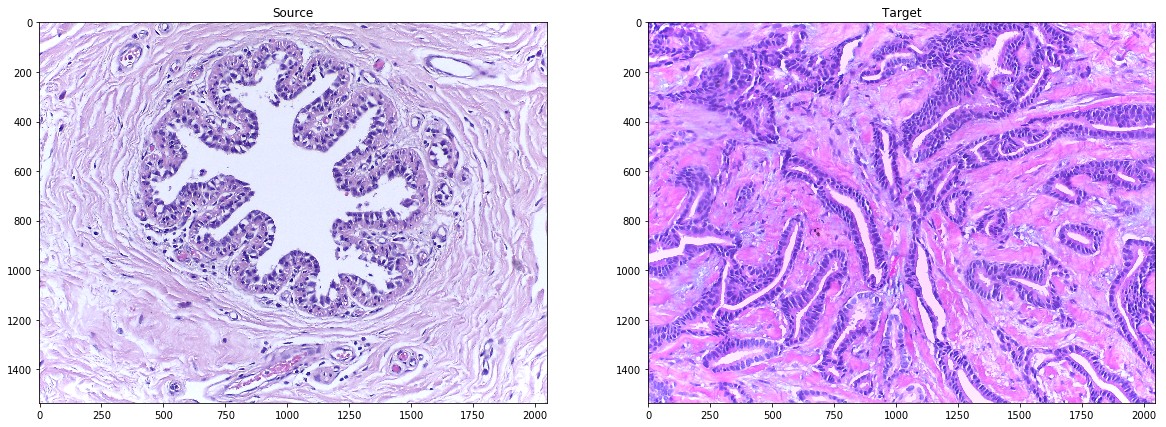

In [136]:
source_image = utils.prepare(utils.read_image(SOURCE_PATH))
target_image = utils.prepare(utils.read_image(TARGET_PATH))
print('source image size: ', source_image.shape)
print('target image size: ', target_image.shape)
plt.figure(figsize=(20.0, 10.0))
plt.subplot(1, 2, 1)
plt.title('Source')
plt.imshow(source_image)
plt.subplot(1, 2, 2)
plt.title('Target')
plt.imshow(target_image)
plt.show()

In [137]:
Ws, Hs = vhd.SNMF(source_image)
Wt, Ht = vhd.SNMF(target_image)
print(Wt)
print(Ws)

getV: 0.2838590145111084 s
getW: 1.0032620429992676 s
getH: 0.9828240871429443 s
getV: 0.2812769412994385 s
getW: 1.0030031204223633 s
getH: 0.8670997619628906 s
[[0.54013239 0.12017763]
 [0.83437644 0.9927524 ]
 [0.10987701 0.        ]]
[[0.63497785 0.45704037]
 [0.70810872 0.87063012]
 [0.30884489 0.18198157]]


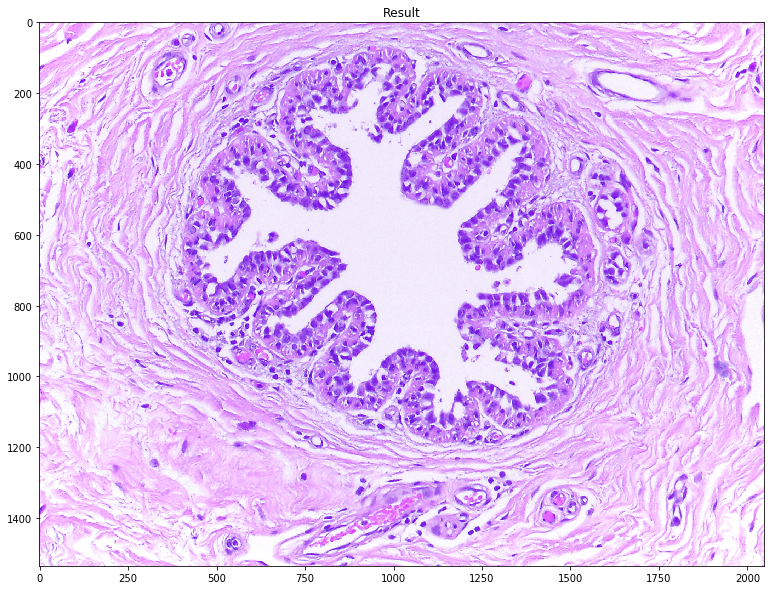

True

In [138]:
img = vhd.SPCN(source_image, Ws, Hs, Wt, Ht)
plt.figure(figsize=(20.0, 10.0))
plt.title('Result')
plt.imshow(img)
plt.show()
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite(RESULT_PATH, img)